<a href="https://colab.research.google.com/github/quezia-cassiano/ds_avaliacao/blob/main/atvd_avaliativa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Essa análise exploratória tem como objetivo analisar a incidência dos casos de dengue pré e pós pandemia, fazendo o levantamento de dados dos anos de 2018 a 2021. Através dos números de notificações de casos, data dos casos e do código municipal, será avaliado a frequência com que esses casos ocorreram em cada ano e possíveis influências.**

**Atuaram nessa pesquisa:** *Everton Gabriel Silva dos Anjos e Quézia Cassiano de Souza Silva.*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#definindo base de dados

dengue = pd.read_csv('/content/dadosdengue.csv',  sep=";")

In [ ]:
#vizualizando primeiros registros da base de dados
dengue.head()

,nu_notificacao,tp_notificacao,co_cid,dt_notificacao,ds_semana_notificacao,notificacao_ano,co_uf_notificacao,co_municipio_notificacao,id_regional,co_unidade_notificacao,...,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112
0,3163014,2,A90,04/01/2019,201901,2019,26,261160,1497,1015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3257708,2,A90,21/05/2019,201921,2019,26,261160,1497,1120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3173295,2,A90,09/01/2019,201902,2019,26,261160,1497,930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3174753,2,A90,03/01/2019,201901,2019,26,261160,1497,671,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3174754,2,A90,02/01/2019,201901,2019,26,261160,1497,671,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#solicitando quantidade de linhas e colunas do arquivo

dengue.shape

(22755, 113)

In [ ]:
#obtendo informações do arquivo
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22755 entries, 0 to 22754
Columns: 113 entries, nu_notificacao to Unnamed: 112
dtypes: float64(61), object(52)
memory usage: 19.6+ MB


In [ ]:
#solicitando total de dados nulos presentes na base de dados
dengue.isnull().sum().sum()

1463613

In [ ]:
#vizualizando
dengue.describe()

,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,...,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#fazendo copia de segurança antes de iniciar manipulação dos dados
dados = dengue.copy()

In [ ]:
#descartanto valores nulos
dados.dropna(inplace = True)

In [ ]:
#conferindo se restou algum valor nulo
dados.isnull().sum()

nu_notificacao           0.0
tp_notificacao           0.0
co_cid                   0.0
dt_notificacao           0.0
ds_semana_notificacao    0.0
                        ... 
Unnamed: 108             0.0
Unnamed: 109             0.0
Unnamed: 110             0.0
Unnamed: 111             0.0
Unnamed: 112             0.0
Length: 113, dtype: float64

In [ ]:
#vixuslizando novamente o colume de linhas e colunas após a 'limpeza' de dados nulos
dados.shape

(0, 113)

In [ ]:
dengue.columns

Index(['nu_notificacao', 'tp_notificacao', 'co_cid', 'dt_notificacao',
       'ds_semana_notificacao', 'notificacao_ano', 'co_uf_notificacao',
       'co_municipio_notificacao', 'id_regional', 'co_unidade_notificacao',
       ...
       'Unnamed: 103', 'Unnamed: 104', 'Unnamed: 105', 'Unnamed: 106',
       'Unnamed: 107', 'Unnamed: 108', 'Unnamed: 109', 'Unnamed: 110',
       'Unnamed: 111', 'Unnamed: 112'],
      dtype='object', length=113)

In [ ]:
#inicio de seleção de dados para exibição

anos = dengue['notificacao_ano'][dengue['notificacao_ano'] != 'notificacao_ano']
ano_caso = anos.value_counts()
ano_caso = ano_caso.sort_index()  # Ordenar os anos em ordem crescente

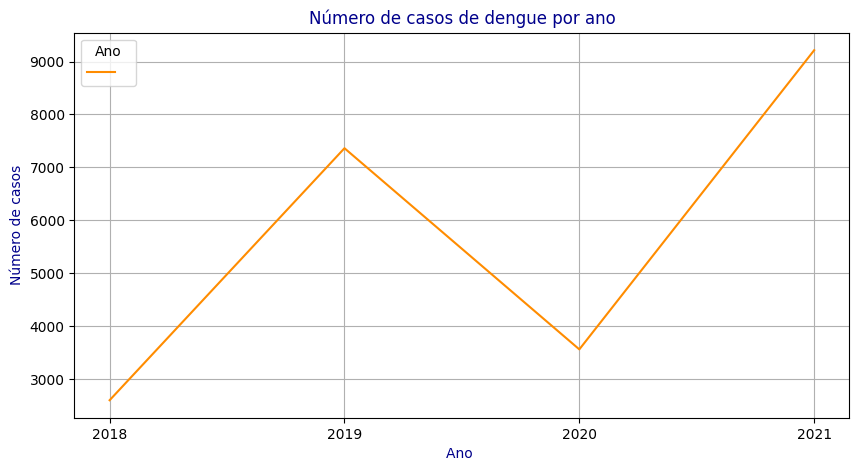

In [ ]:
#montando grafico de linha do tempo entre os anos

cores = ['darkred', 'darkorange', 'orange',  'yellow'  ]
plt.figure(figsize=(10, 5))  # Ajustar o tamanho da figura
plt.plot(ano_caso.index.astype(str), ano_caso, color='darkorange')
plt.grid(True)
plt.xlabel('Ano ', color='darkblue')
plt.ylabel('Número de casos', color='darkblue')
plt.title('Número de casos de dengue por ano', color='darkblue')

# Adicionar uma legenda
plt.legend(' Ano', title='Ano')

**Conforme mostrado na linha do tempo acima, podemos enxergar uma crescente significativa de casos relatados.**

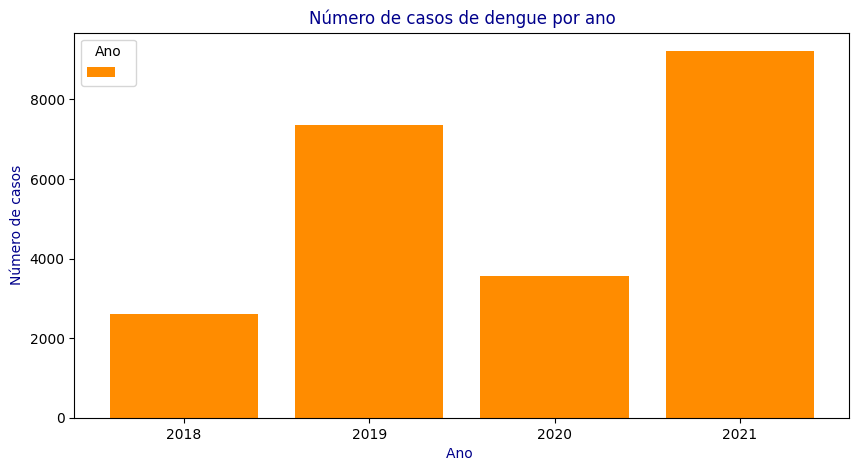

In [ ]:
#comparando numero de casos entre os anos

cores = ['darkred', 'darkorange', 'orange',  'yellow'  ]
plt.figure(figsize=(10, 5))  # Ajustar o tamanho da figura
plt.bar(ano_caso.index.astype(str), ano_caso, color='darkorange')
plt.xlabel('Ano ', color='darkblue')
plt.ylabel('Número de casos', color='darkblue')
plt.title('Número de casos de dengue por ano', color='darkblue')

# Adicionar uma legenda
plt.legend(' Ano', title='Ano')

***Conclusão: Com base na análise dos dados dispostos, é possível observar que os casos de dengue na cidade do Recife cresceram durante o período de 4 anos, sendo estes de 2018 a 2021. Atentando-se à queda de casos notificados no ano de 2020, devido a abrupta incidência do COVID-19, pois como informa a pauta gerada pelo Ministério da Saúde: ''Febre, dor de cabeça, dores no corpo e cansaço muscular. Esses são sintomas comumente relatados por quem contrai dengue ou Covid-19, de forma que pode ser difícil diferenciar as duas doenças.'' No que tange as variáveis dos dados, é importante observar que esta é uma hipótese que requer um aprofundamento da análise e a consideração de outros fatores que podem ter contribuído para esse aumento. Portanto, investigações adicionais são necessárias para validar essa hipótese e para compreender quais seriam outros fatores para o número de ocorrências, como fator climático, de saneamento básico, entre outras possibilidades.***

**REFERÊNCIA:** [Dengue e Covid-19](https://www.gov.br/saude/pt-br/assuntos/noticias/2022/novembro/dengue-e-covid-19-conheca-os-sinais-das-duas-doencas-e-aprenda-a-diferenciar-os-sintomas#:~:text=Febre%2C%20dor%20de%20cabeça%2C%20dores,difícil%20diferenciar%20as%20duas%20doenças.)





**Fatores Contribuintes: Considerando o período de pandemia, é plausível presumir a razão para à queda de notificações de casos de dengue no ano de 2020 e o seu rápido crescimento no ano seguinte, 2021. Embora outros fatores possam ter influenciado esse aumento, como mudanças climáticas, conscientização da população sobre a doença e seus sintomas. Verifica-se que a pandemia é um fator exponecial tanto no aumento quanto na dificuldade de mediar os casos de dengue.**

**Importância da Conclusão: Compreender o aumento dos casos de dengue é fundamental para direcionar recursos e estratégias de saúde pública, uma vez que a dengue é uma doença de nível grave, como causa de mortes. Essa análise de dados, é uma premissa para que se possa analisar os padrões para a frequência dessas ocorrências. À vista disso, cabe a necessiade de medidas de prevenção para um combate contra a dengue mais eficazes e da conscientização sobre a doença, suas diferenças em comparação com outras doenças, a exemplo, a COVID-19, e o perigo das consequências de sua contaminação, que podem causar sequelas durante anos.**

REFERÊNCIA: [Sequelas Dengue](/https://agenciadenoticias.uniceub.br/saude/dengue/)